In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#TEST
df = pd.read_csv('dataset.csv')
print(df.head())

#Question1.1

classification = {
    'Title': 'Nominal',  #Title serves as a label for all the movies hence nominal
    'Year': 'Interval',  #Year is usually written in the format *2000 -2001* hence interval, but its just a single year here, but for now lets consider it interval of a whole year
    'Age': 'Ordinal',  #Age has an order
    #Any of the below ratings are interval, they are scored in a range all time, either 0-1 or 0-100 or percentage
    'IMDb': 'Interval', 
    'Rotten Tomatoes': 'Interval',  
    #These are showing the availabaility of that respective content on the platform so nominal, 0- No; 1 -Yes
    'Netflix': 'Nominal',  
    'Hulu': 'Nominal', 
    'Prime Video': 'Nominal', 
    'Disney+': 'Nominal' 
}


for column, dtype in classification.items():
    print(f'{column}: {dtype}')




   Unnamed: 0             Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0      Breaking Bad  2008  18+   9.5             96%        1   
1           1   Stranger Things  2016  16+   8.8             93%        1   
2           2       Money Heist  2017  18+   8.4             91%        1   
3           3          Sherlock  2010  16+   9.1             78%        1   
4           4  Better Call Saul  2015  18+   8.7             97%        1   

   Hulu  Prime Video  Disney+  
0     0            0        0  
1     0            0        0  
2     0            0        0  
3     0            0        0  
4     0            0        0  
Title: Nominal
Year: Interval
Age: Ordinal
IMDb: Interval
Rotten Tomatoes: Interval
Netflix: Nominal
Hulu: Nominal
Prime Video: Nominal
Disney+: Nominal


In [24]:
#Finds and indexes the rows with missing values using isnull()
rows_with_missing_values = df[df.isnull().any(axis=1)].index.tolist()
missing_values = df.isnull().sum()
#Finds and indexes the rows with duplicates using duplicated()
rows_with_duplicates = df[df.duplicated()].index.tolist()
duplicates = df.duplicated().sum()
#Prints the 
print("missing_values:",missing_values)
print("Rows with missing values:", rows_with_missing_values)
print("duplicates:",duplicates)
print("Rows with duplicates:", rows_with_duplicates)



data_types = df.dtypes
data_types

missing_values: Unnamed: 0           0
Title                0
Year                 0
Age                 31
IMDb                 0
Rotten Tomatoes    155
Netflix              0
Hulu                 0
Prime Video          0
Disney+              0
dtype: int64
Rows with missing values: [9, 85, 93, 96, 119, 128, 132, 151, 159, 172, 177, 183, 184, 189, 193, 196, 197, 198, 205, 207, 213, 219, 221, 229, 231, 232, 239, 240, 241, 245, 248, 251, 253, 256, 257, 260, 265, 267, 279, 280, 281, 282, 285, 286, 289, 290, 291, 293, 302, 303, 305, 308, 313, 318, 320, 321, 324, 325, 330, 331, 332, 335, 339, 340, 341, 343, 346, 350, 351, 354, 355, 359, 360, 361, 363, 366, 367, 368, 372, 375, 376, 378, 381, 382, 384, 388, 389, 391, 392, 394, 395, 396, 397, 398, 399, 401, 403, 404, 406, 408, 409, 410, 412, 414, 416, 417, 418, 419, 420, 421, 423, 424, 425, 429, 430, 431, 432, 433, 435, 436, 439, 443, 444, 445, 446, 447, 448, 449, 450, 452, 453, 454, 455, 456, 457, 459, 460, 462, 463, 464, 466, 467, 468, 472,

Unnamed: 0           int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
dtype: object

In [25]:
# Question 3
summary_stats = df[['IMDb', 'Rotten Tomatoes']].describe()
print(summary_stats)

             IMDb
count  511.000000
mean     7.857143
std      0.646091
min      5.800000
25%      7.450000
50%      7.900000
75%      8.300000
max      9.500000


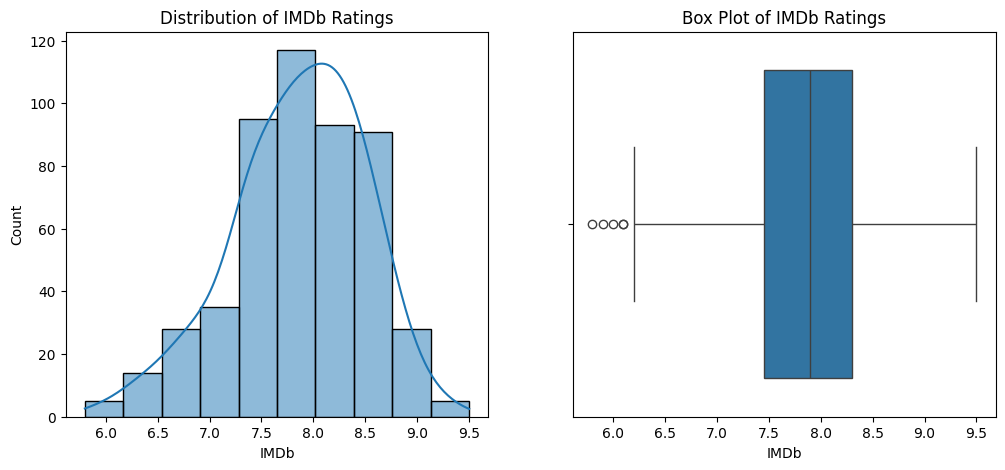

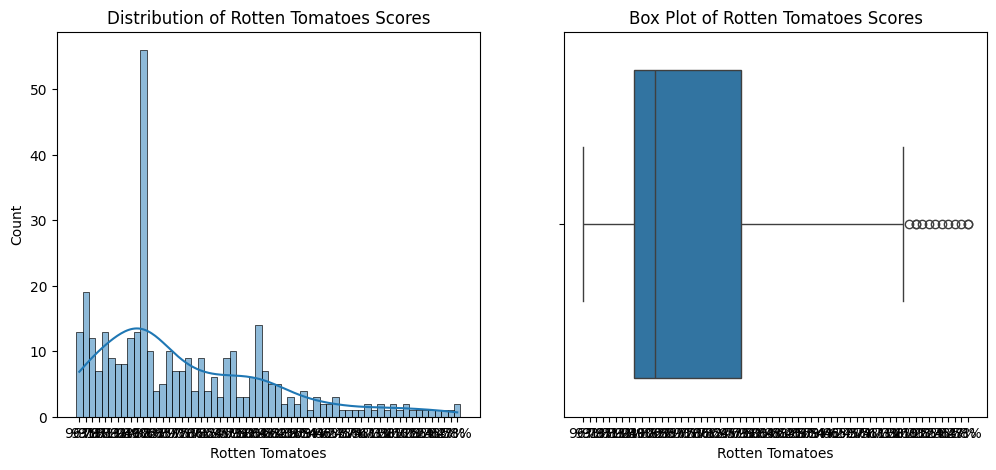

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['IMDb'], bins=10, kde=True)
plt.title('Distribution of IMDb Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['IMDb'])
plt.title('Box Plot of IMDb Ratings')

plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Rotten Tomatoes'], bins=10, kde=True)
plt.title('Distribution of Rotten Tomatoes Scores')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Rotten Tomatoes'])
plt.title('Box Plot of Rotten Tomatoes Scores')

plt.show()

In [27]:
# 5. Outlier Handling
# Identify outliers using IQR
Q1 = df['IMDb'].quantile(0.25)
Q3 = df['IMDb'].quantile(0.75)
IQR = Q3 - Q1
outliers_imdb = df[(df['IMDb'] < (Q1 - 1.5 * IQR)) | (df['IMDb'] > (Q3 + 1.5 * IQR))]

print(f'Number of outliers in IMDb ratings: {outliers_imdb.shape[0]}')

# Handle outliers by capping
df['IMDb'] = np.where(df['IMDb'] > (Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, df['IMDb'])
df['IMDb'] = np.where(df['IMDb'] < (Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, df['IMDb'])


Number of outliers in IMDb ratings: 5


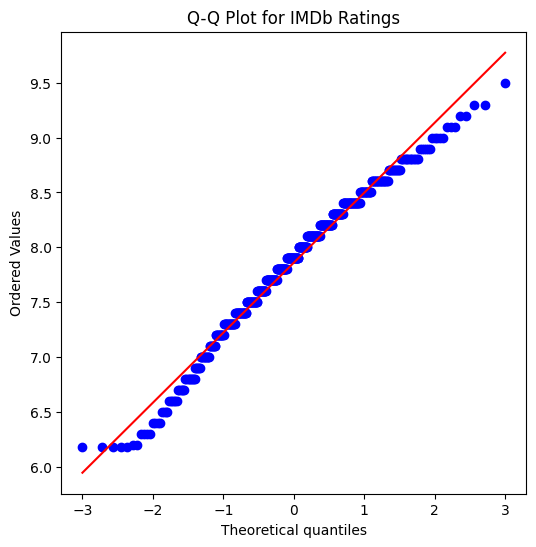

In [28]:
# 6. Normal Probability Plot (Q-Q Plot)
plt.figure(figsize=(6, 6))
stats.probplot(df['IMDb'], dist="norm", plot=plt)
plt.title('Q-Q Plot for IMDb Ratings')
plt.show()


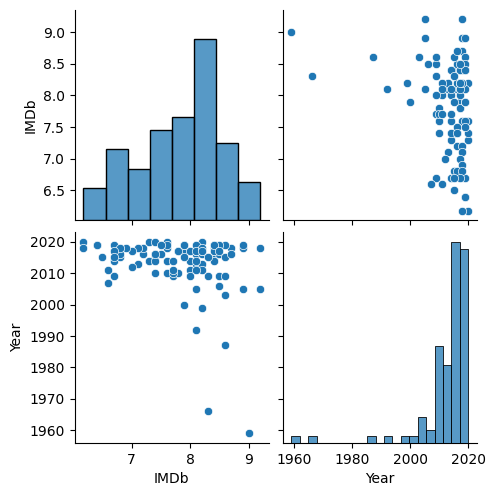

In [29]:
# 8. Pair Plot Analysis
sample_df = df.sample(100)
sns.pairplot(sample_df[['IMDb', 'Rotten Tomatoes', 'Year']])
plt.show()


In [30]:
# 9. Hypothesis Testing
# Null Hypothesis: H0: mean IMDb ratings for Netflix = mean IMDb ratings for Hulu
# Alternative Hypothesis: H1: mean IMDb ratings for Netflix ≠ mean IMDb ratings for Hulu

netflix_ratings = df[df['Netflix'] == 1]['IMDb']
hulu_ratings = df[df['Hulu'] == 1]['IMDb']

t_stat, p_value = stats.ttest_ind(netflix_ratings, hulu_ratings)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -2.4527241187805973, P-value: 0.014474911825723328


In [31]:
#10.Margin of Error
mean_diff=netflix_ratings.mean() -hulu_ratings.mean()
std_netflix = netflix_ratings.std()
std_hulu = hulu_ratings.std()

print(f'Mean Difference (Netflix - Hulu): {mean_diff}')
print(f'Standard Deviation for Netflix Ratings: {std_netflix}')
print(f'Standard Deviation for Hulu Ratings: {std_hulu}')

Mean Difference (Netflix - Hulu): -0.20657411937377734
Standard Deviation for Netflix Ratings: 0.6406970234342113
Standard Deviation for Hulu Ratings: 0.5885734030634164


In [ ]:
#12. Feature engineering
def age_group(age_rating):
    if age_rating in ['G', 'PG']:
        return 'Children'
    elif age_rating == 'PG-13':
        return 'Teen'
    elif age_rating in ['R', 'NC-17']:
        return 'Adult'
    else:
        return 'Unrated'

df['Age_Group'] = df['Age'].apply(age_group)


df['Platform_Availability_Count'] = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)

NameError: name 'data' is not defined